# Data Collection And Processing

## Imports

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
sns.set_style("darkgrid")
pd.set_option('display.max_columns',None)

## Data loading and initial analysis

In [27]:
df = pd.read_csv('Data/Raw Data/Raw Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [28]:
df.shape

(800, 22)

In [29]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [30]:
objcolumns = df.iloc[:,:-1].select_dtypes(include=['object']).columns.tolist()
for c in objcolumns:
    print(c , df[c].unique(),'\n')

gender ['f' 'm'] 

ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others'] 

jaundice ['no' 'yes'] 

austim ['no' 'yes'] 

contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh'] 

used_app_before ['no' 'yes'] 

age_desc ['18 and more'] 

relation ['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional'] 



## Pre-Processing

In [31]:
# droping age_desc and ID as it doesnt affect the target
df.drop(columns=['ID','age_desc'],axis=1,inplace=True)

### Cleaning country of res and changing it to region

In [32]:
# Cleaning country of res
region_map = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Nicaragua': 'North America',
    'AmericanSamoa': 'North America',
    'Bahamas': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Bolivia': 'South America',
    
    # Europe
    'United Kingdom': 'Europe',
    'Austria': 'Europe',
    'Ukraine': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'Italy': 'Europe',
    'Ireland': 'Europe',
    'Russia': 'Europe',
    'Serbia': 'Europe',
    'Sweden': 'Europe',
    'Iceland': 'Europe',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'Cyprus': 'Europe',
    'Belgium': 'Europe',
    
    # Middle East
    'Jordan': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Iraq': 'Middle East',
    'Oman': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Iran': 'Middle East',
    'Azerbaijan': 'Middle East',
    'Armenia': 'Middle East',
    
    # Asia
    'India': 'Asia',
    'Malaysia': 'Asia',
    'Viet Nam': 'Asia',
    'Sri Lanka': 'Asia',
    'Hong Kong': 'Asia',
    'China': 'Asia',
    'Pakistan': 'Asia',
    'Japan': 'Asia',
    'Bangladesh': 'Asia',
    
    # Africa
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Ethiopia': 'Africa',
    'Angola': 'Africa',
    'Sierra Leone': 'Africa',
    'Niger': 'Africa',
    'Burundi': 'Africa',
    
    # Oceania
    'New Zealand': 'Oceania',
    'Australia': 'Oceania',
    'Tonga': 'Oceania',
    
    # Others - countries that might be incorrectly spelled or need special handling
    'Kazakhstan': 'Central Asia',
    'Aruba': 'Caribbean',
}

# Apply the mapping to create a new 'region' column 
df.insert(len(df.columns) - 2, 'region', df['contry_of_res'].map(region_map))
df.drop(columns=['contry_of_res'],axis=1,inplace=True)

# Any countries not in the mapping will have NaN in the region column
# Replace NaN values with 'Other'
df['region'] = df['region'].fillna('Other')

# Verify the mapping
region_counts = df['region'].value_counts()
print(region_counts)

region
North America    182
Europe           166
Asia             147
Middle East      121
Oceania          116
Other             22
Africa            16
South America     16
Central Asia      10
Caribbean          4
Name: count, dtype: int64


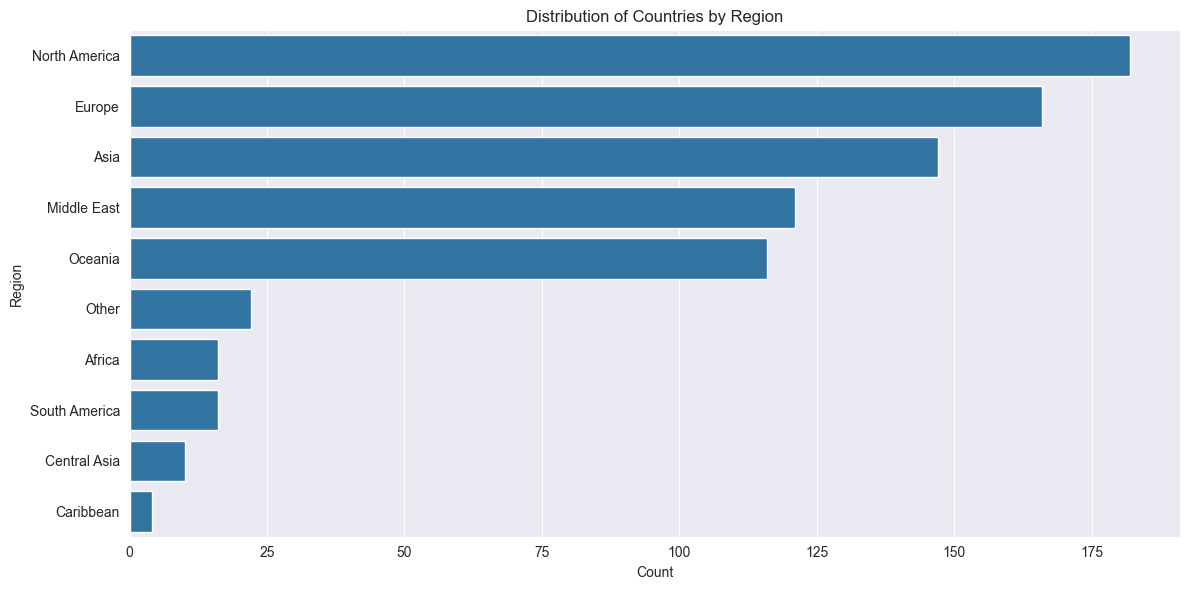

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='region', data=df, order=region_counts.index)
plt.title('Distribution of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [34]:
# rounding off age to whole numbers
df['age']=df['age'].apply(lambda x: round(x, 0)).astype(int)

## **EDA(Exploratory data analysis)**

## 1. Univariate analysis for numerical data(Age and Result)

### 1.1 age

mean= 28.4425
median= 25.0


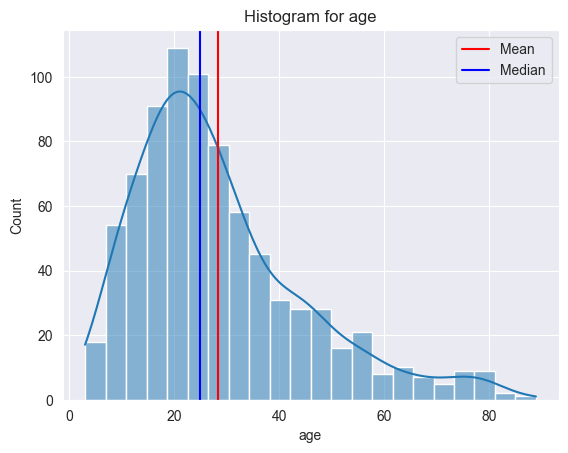

In [35]:
sns.histplot(df['age'],kde=True)
mean=df['age'].mean()
median=df['age'].median()
plt.axvline(mean,color='red',label="Mean")
plt.axvline(median,color='blue',label="Median")
plt.legend()
plt.title('Histogram for age')
plt.show
print('mean=',mean)
print('median=',median)

<function matplotlib.pyplot.show(close=None, block=None)>

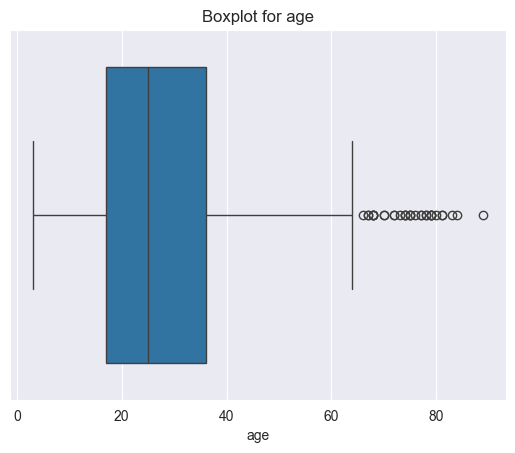

In [36]:
sns.boxplot(x=df['age'])
plt.title('Boxplot for age')
plt.show

In [37]:
#outlier analysis using iqr method
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
age_outlier=df[(df['age']<lb) | (df['age']>ub)]
len(age_outlier)


33

In [38]:
# Calculate the median of the age column
age_median = df['age'].median()

# Replace outliers with the median
df.loc[(df['age'] < lb) | (df['age'] > ub), 'age'] = age_median



### 1.2 result

mean= 8.537303106501248
median= 9.605299308


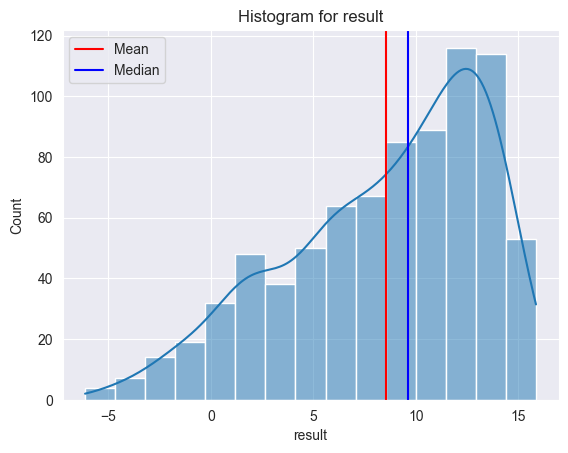

In [39]:
sns.histplot(df['result'],kde=True)
mean=df['result'].mean()
median=df['result'].median()
plt.axvline(mean,color='red',label="Mean")
plt.axvline(median,color='blue',label="Median")
plt.legend()
plt.title('Histogram for result')
plt.show
print('mean=',mean)
print('median=',median)

<function matplotlib.pyplot.show(close=None, block=None)>

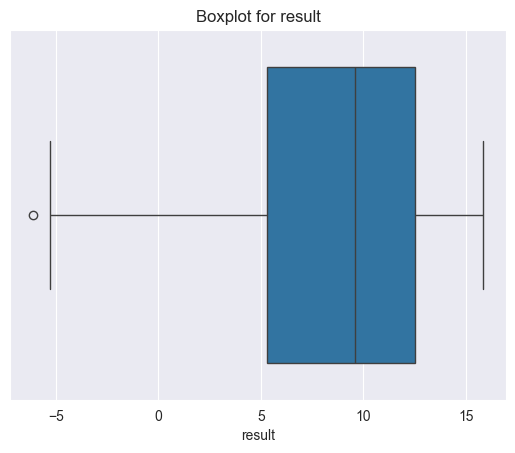

In [40]:
sns.boxplot(x=df['result'])
plt.title('Boxplot for result')
plt.show

In [41]:
#outlier analysis using iqr method
q1=df['result'].quantile(0.25)
q3=df['result'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
result_outlier=df[(df['result']<lb) | (df['result']>ub)]
len(result_outlier)

1

## 2. Univariate analysis for categorical columns

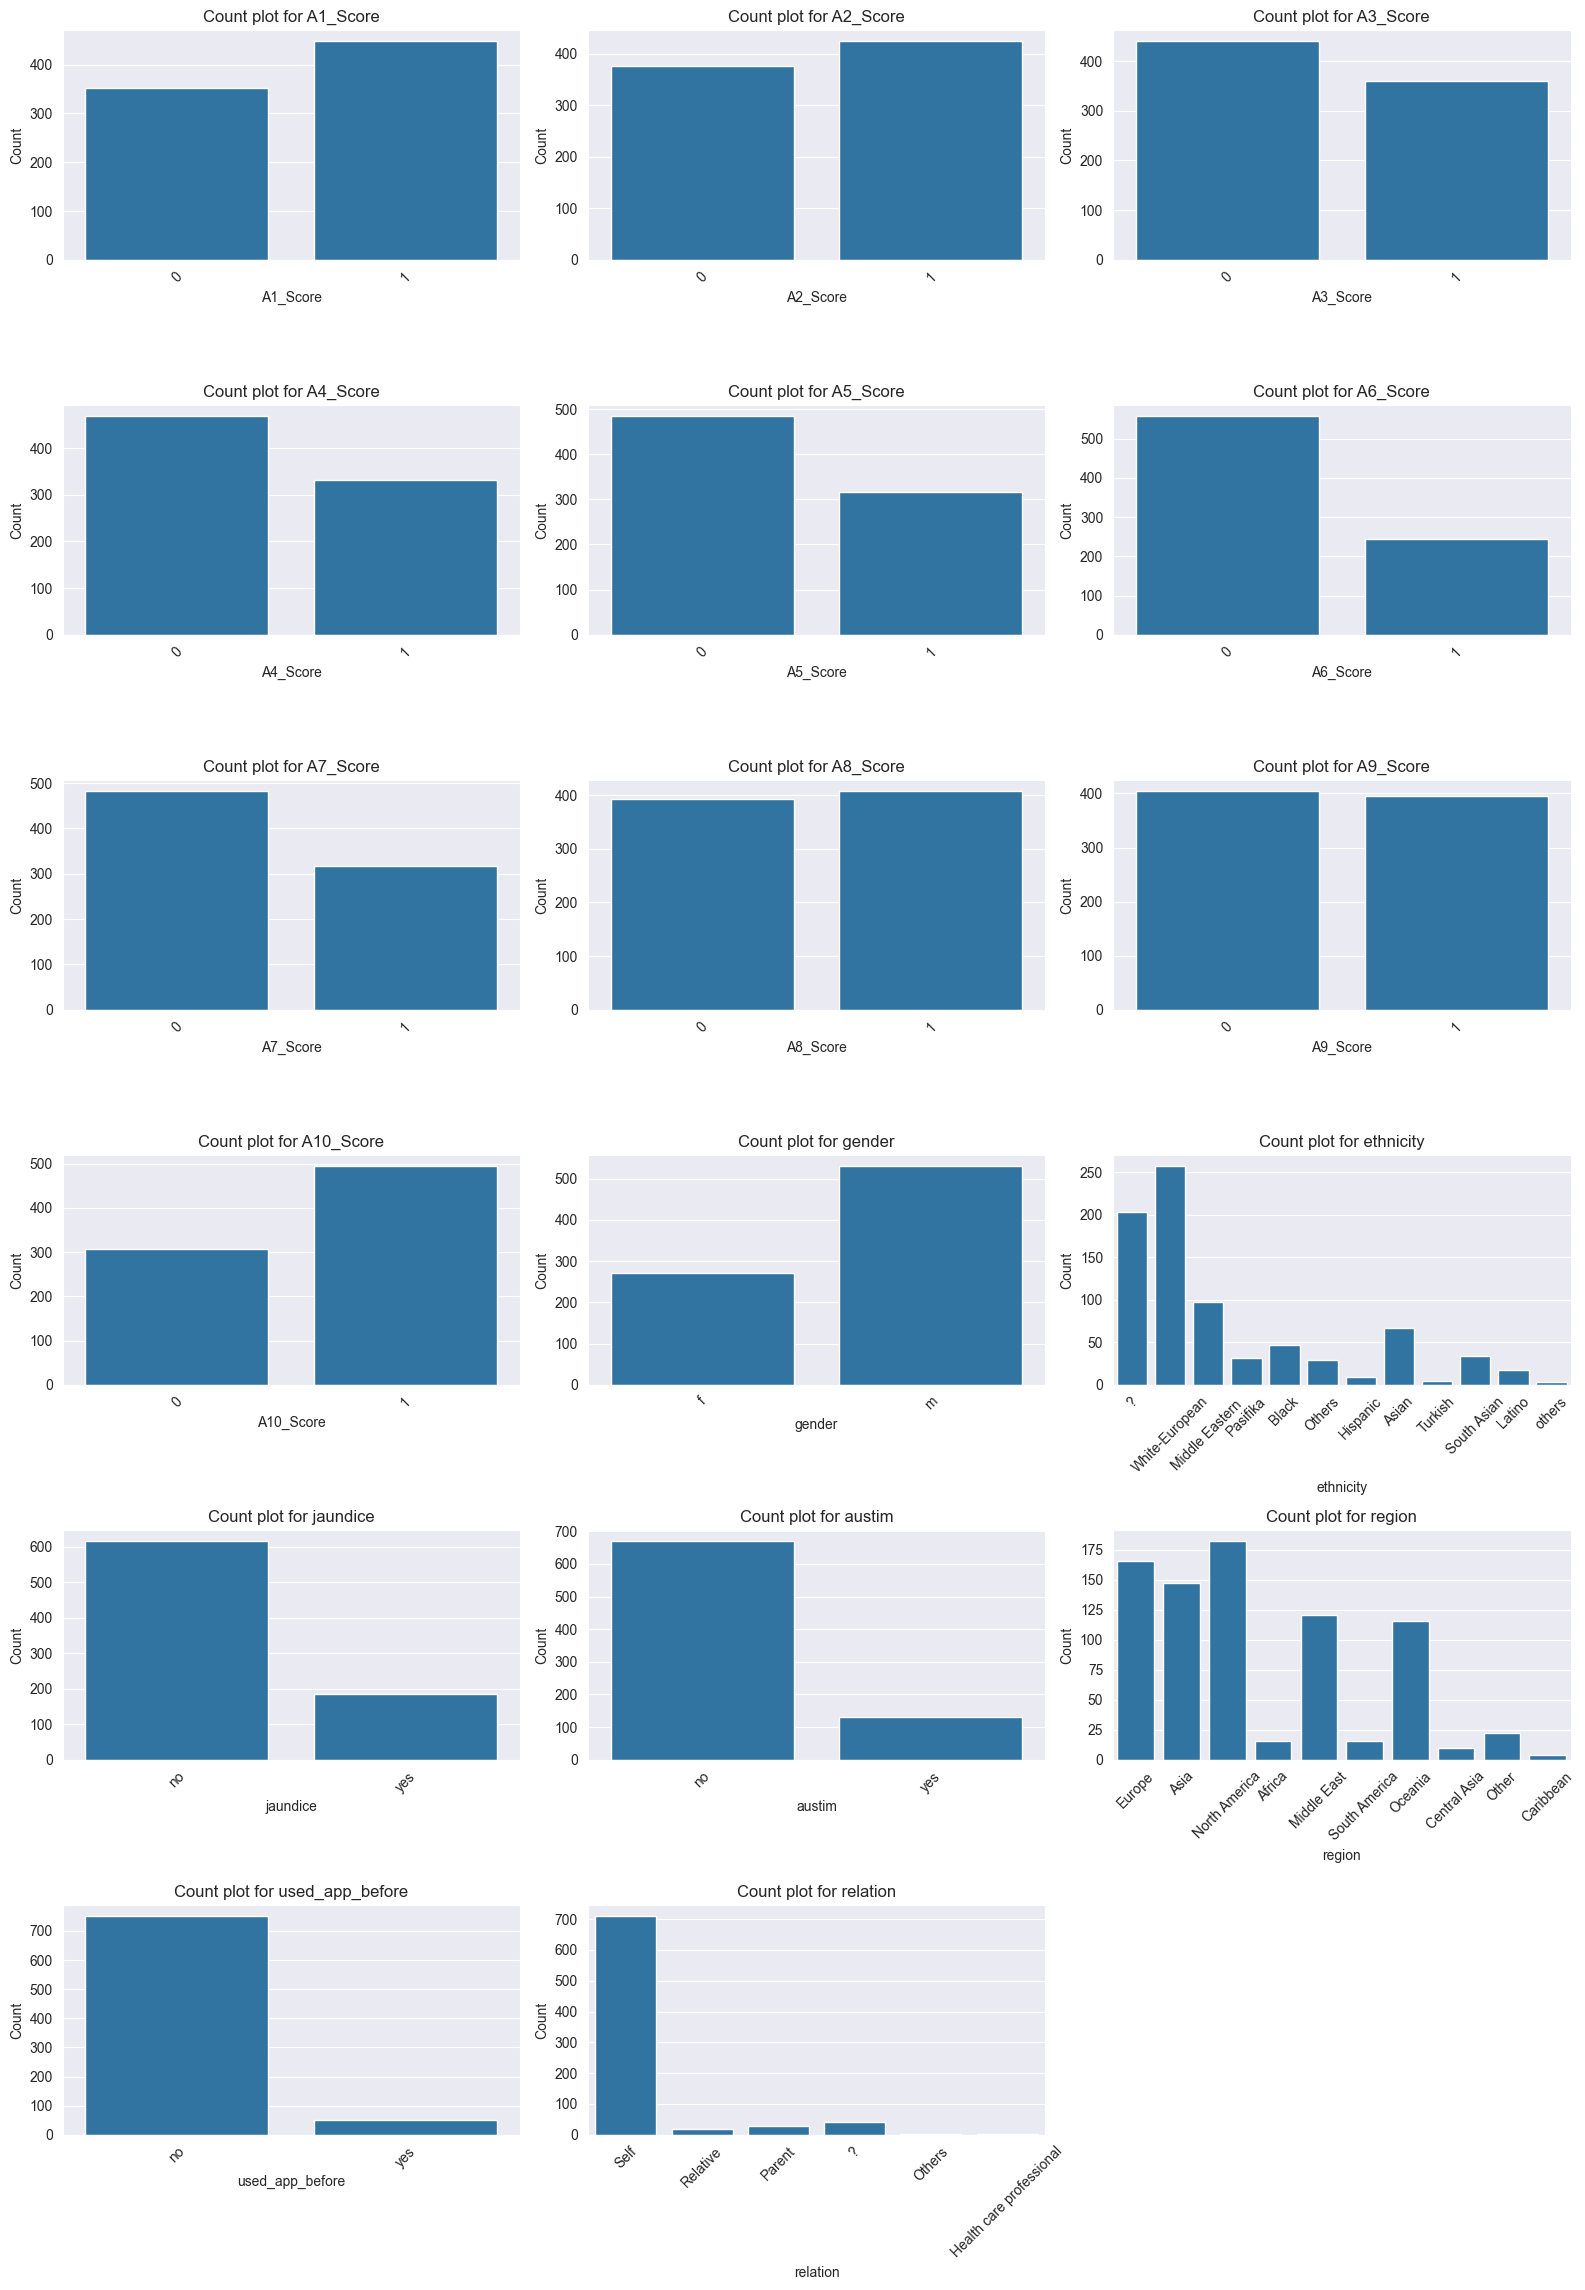

In [42]:
fig,ax = plt.subplots(ncols=3,nrows=6,figsize=(16,23))
ax = ax.flatten()
cat_columns= ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score','A9_Score', 
                'A10_Score','gender','ethnicity', 'jaundice', 'austim', 'region', 'used_app_before','relation']
for i, col in enumerate(cat_columns): 
    sns.countplot(data=df, x=col, ax=ax[i])
    # Rotate x-axis labels if needed
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].set_title(f"Count plot for {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")
    
for j in range(len(cat_columns), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

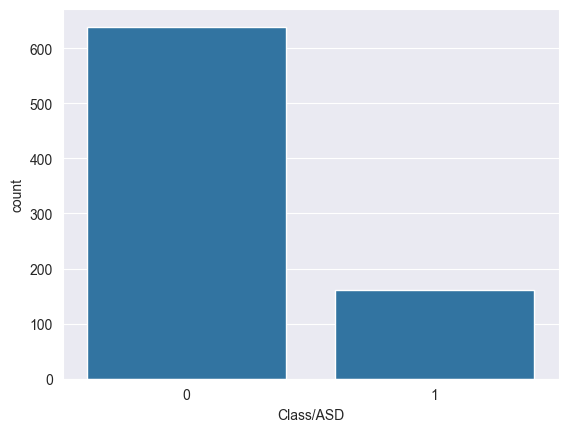

In [43]:
## Count Plot for Target (Class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.show()

## Pre-Processing the data

### 1. Label Encoding (Binary Categorical columns)

In [44]:
## Label Encoding
bin_columns=['gender','jaundice', 'austim','used_app_before']
le=LabelEncoder()
for c in bin_columns:
    df[c]=le.fit_transform(df[c])

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,region,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,?,0,0,0,6.351166,Europe,Self,0
1,0,0,0,0,0,0,0,0,0,0,48,1,?,0,0,0,2.255185,Asia,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,1,White-European,0,1,0,14.851484,North America,Self,1
3,0,0,0,0,0,0,0,0,0,0,24,0,?,0,0,0,2.276617,North America,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,1,?,0,0,0,-4.777286,Africa,Self,0


## 2. Handling nul values (relation and ethnicity)

### 2.1 Cleaning relation

In [45]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [46]:
map_rel = {'?':'Others','Health care professional':'Others', 'Parent':'Others','Relative': 'Others',}

df.replace({'relation': map_rel}, inplace=True)

df['relation'].value_counts()

relation
Self      709
Others     91
Name: count, dtype: int64

### 2.2  cleaning ethnicity

In [47]:
map_eth = {'?':'Others','others':'Others'}
df.replace({'ethnicity':map_eth},inplace=True)
df['ethnicity'].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

## Encoding remaining categorical features 

### Creating different encoding methods

In [48]:
def target_encode(df, columns, target='autism', drop_original=True):
    encoded_df = df.copy()
    mapping_dict = {}
    
    for col in columns:
        # Add smoothing to handle rare categories
        means = df.groupby(col)[target].mean()
        encoded_df[f'{col}_target'] = df[col].map(means)
        mapping_dict[col] = means.to_dict()
    
    # Print mapping dictionary
    print("\nTarget Encoding Mappings:")
    for col, mappings in mapping_dict.items():
        print(f"\n{col}:")
        for category, value in mappings.items():
            print(f"  {category}: {value:.4f}")
            
    # Remove original columns if requested
    if drop_original:
        encoded_df = encoded_df.drop(columns=columns)
        
    return encoded_df, mapping_dict

def ohe_with_grouping(df, columns, threshold=0.01, drop_original=True):
    result = df.copy()
    mapping_dict = {}
    
    for col in columns:
        # Group rare categories
        value_counts = df[col].value_counts(normalize=True)
        rare_mask = value_counts < threshold
        rare_categories = value_counts[rare_mask].index.tolist()
        
        # Store mapping
        mapping_dict[col] = {
            'rare_categories': rare_categories,
            'threshold': threshold
        }
        
        # Create new column with grouped categories
        result[col + '_grouped'] = result[col].apply(lambda x: 'Other' if x in rare_categories else x)
        
        # One-hot encode
        dummies = pd.get_dummies(result[col + '_grouped'], prefix=col)
        result = pd.concat([result, dummies], axis=1)
        
        # Remove the temporary grouped column
        result = result.drop(columns=[col + '_grouped'])
    
    # Print mapping dictionary
    print("\nOne-Hot Encoding Mappings (with grouping):")
    for col, mappings in mapping_dict.items():
        print(f"\n{col}:")
        print(f"  Threshold: {mappings['threshold']}")
        print(f"  Categories grouped as 'Other': {mappings['rare_categories']}")
            
    # Remove original columns if requested
    if drop_original:
        result = result.drop(columns=columns)
        
    return result, mapping_dict

def frequency_encode(df, columns, drop_original=True):
    result = df.copy()
    mapping_dict = {}
    
    for col in columns:
        freq = df[col].value_counts(normalize=True)
        result[f'{col}_freq'] = df[col].map(freq)
        mapping_dict[col] = freq.to_dict()
    
    # Print mapping dictionary
    print("\nFrequency Encoding Mappings:")
    for col, mappings in mapping_dict.items():
        print(f"\n{col}:")
        for category, value in mappings.items():
            print(f"  {category}: {value:.4f}")
    
    # Remove original columns if requested
    if drop_original:
        result = result.drop(columns=columns)
        
    return result, mapping_dict

In [49]:
cat_columns = ['ethnicity','relation', 'region']

target_encoded_df, target_mapping= target_encode(df, cat_columns, target='Class/ASD')
freq_encoded_df, freq_mapping = frequency_encode(df, cat_columns)  
ohe_df, ohe_mapping = ohe_with_grouping(df, cat_columns, threshold=0.01)  


Target Encoding Mappings:

ethnicity:
  Asian: 0.0597
  Black: 0.1277
  Hispanic: 0.2222
  Latino: 0.2353
  Middle Eastern : 0.0619
  Others: 0.0383
  Pasifika: 0.1875
  South Asian: 0.0882
  Turkish: 0.0000
  White-European: 0.4708

relation:
  Others: 0.1538
  Self: 0.2073

region:
  Africa: 0.1875
  Asia: 0.0612
  Caribbean: 0.5000
  Central Asia: 0.3000
  Europe: 0.2470
  Middle East: 0.0909
  North America: 0.4341
  Oceania: 0.0690
  Other: 0.1364
  South America: 0.1250

Frequency Encoding Mappings:

ethnicity:
  White-European: 0.3212
  Others: 0.2938
  Middle Eastern : 0.1212
  Asian: 0.0838
  Black: 0.0587
  South Asian: 0.0425
  Pasifika: 0.0400
  Latino: 0.0213
  Hispanic: 0.0112
  Turkish: 0.0063

relation:
  Self: 0.8862
  Others: 0.1138

region:
  North America: 0.2275
  Europe: 0.2075
  Asia: 0.1837
  Middle East: 0.1512
  Oceania: 0.1450
  Other: 0.0275
  Africa: 0.0200
  South America: 0.0200
  Central Asia: 0.0125
  Caribbean: 0.0050

One-Hot Encoding Mappings (with 

In [50]:
import os
# Create the directory if it doesn't exist
save_path = "Data/Processed Data"
os.makedirs(save_path, exist_ok=True)

# Save the three dataframes
target_encoded_df.to_csv(f"{save_path}/target_encoded_data.csv", index=False)
freq_encoded_df.to_csv(f"{save_path}/frequency_encoded_data.csv", index=False)
ohe_df.to_csv(f"{save_path}/one_hot_encoded_data.csv", index=False)

# Print the paths of the saved files
print("Files saved successfully in:", save_path)

Files saved successfully in: Data/Processed Data
